<a href="https://colab.research.google.com/github/AndrySone/Lab_MMO/blob/main/Lab_4/%D0%98%D0%90%D0%94%D0%B8%D0%9C%D0%9E_%D0%9B%D0%B0%D0%B1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd

%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt

In [49]:
data_source = "/content/drive/MyDrive/ИАДиМО/Лаб_1/Инд задание/Raisin_Dataset.xlsx"
data = pd.read_excel(data_source,
                  names=['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Class'])
dX = data.iloc[ : , 0:7 ]
dy = data['Class']
print(dX.head())
print(dy.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  
0    Kecimen
1    Kecimen
2    Kecimen
3    Kecimen
4    Kecimen
Name: Class, dtype: object


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = \
train_test_split(dX, dy, test_size=0.3, random_state=12)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=5,
                              random_state=21,
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.8111111111111111


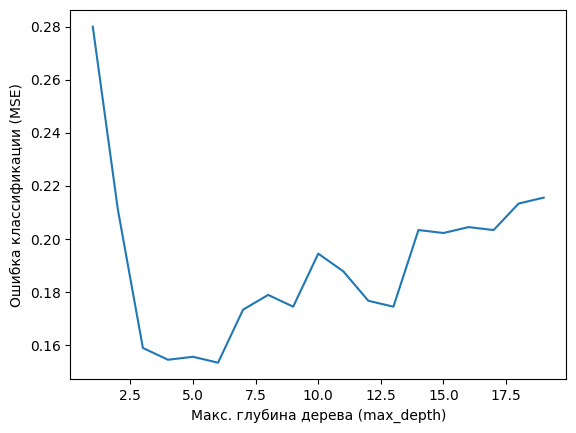

Оптимальные значения max_depth:  [6]


In [51]:
from sklearn.model_selection import cross_val_score

# Значения параметра max_depth
d_list = list(range(1,20))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d,
                                  random_state=21,
                                  max_features=2)
    scores = cross_val_score(tree, dX, dy, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения max_depth: ', all_d_min)

In [52]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(dX, dy)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

# Генерируем графическое представление лучшего дерева (сохранится в файле)
tree.export_graphviz(tree_grid.best_estimator_,
                     feature_names=dX.columns,
                     class_names=dy.unique(),
                     out_file='Raisin_tree.dot',
                     filled=True, rounded=True)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 1, 'max_features': 3}
Лучшие баллы cross validation:  0.8588888888888888


Оптимальное дерево решений


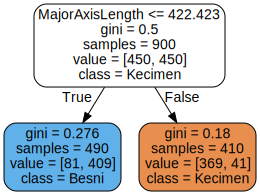

In [59]:
# На самом деле можно визуализировать в Google Colab следующим бразом
import graphviz
dot_data = tree.export_graphviz(tree_grid.best_estimator_,
                     feature_names=dX.columns,
                     class_names=dy.unique(),
                     out_file=None,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
print('Оптимальное дерево решений')
graph

In [54]:
# Поэкспериментируем с визуализацией деревьев...
# max_features = 2, max_depth = 3
dtc = DecisionTreeClassifier(max_depth=5,
                             random_state=21,
                             max_features=1)
# Обучаем
dtc.fit(dX.values, dy)
# Предсказываем
res = dtc.predict([[80856,	670,	500,	0.4,	20100,	0.5,	1300]])
print(res)

['Kecimen']


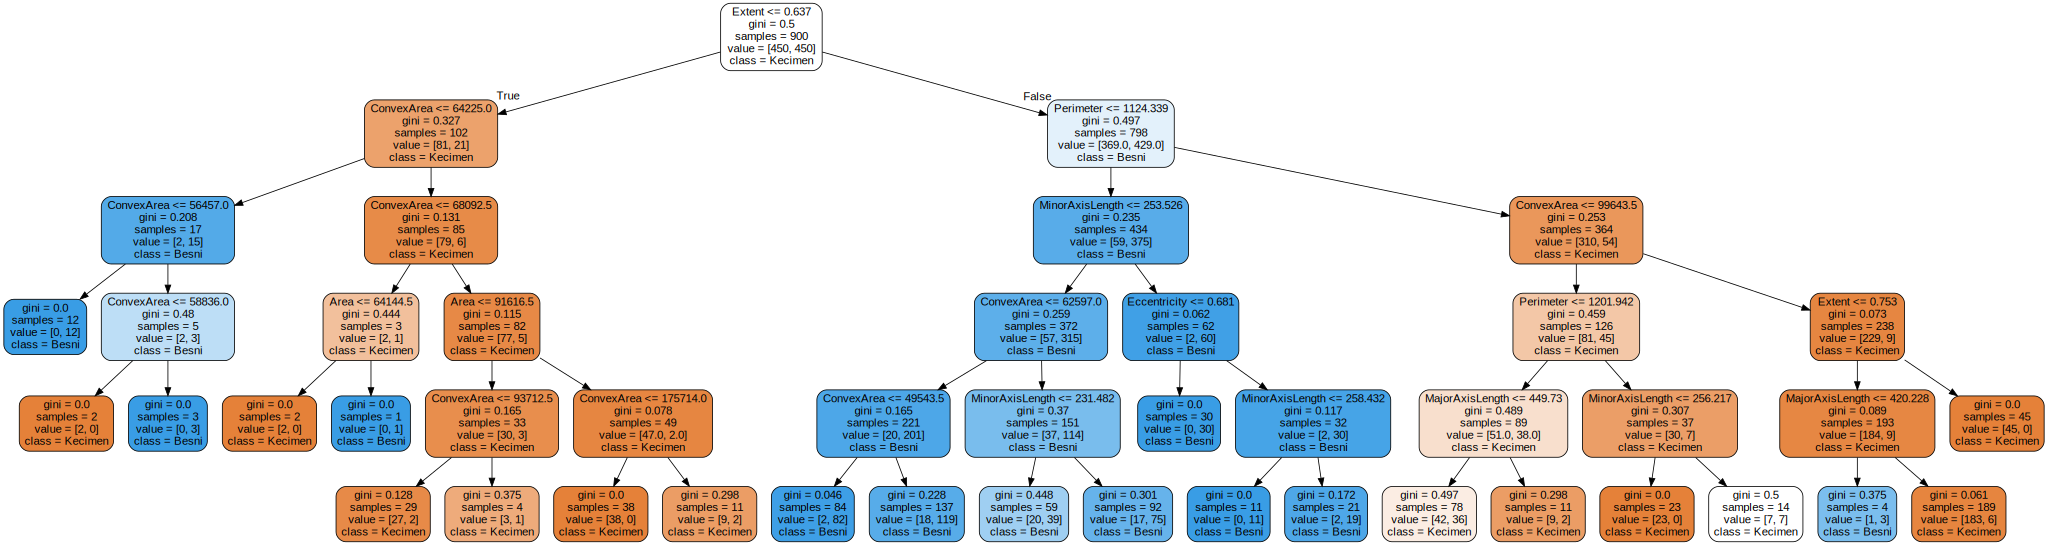

In [58]:
dot_data = tree.export_graphviz(dtc,
                     feature_names=dX.columns,
                     class_names=dy.unique(),
                     out_file=None,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [56]:
print(sorted(list(plt.colormaps)))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

['Kecimen' 'Besni']
2


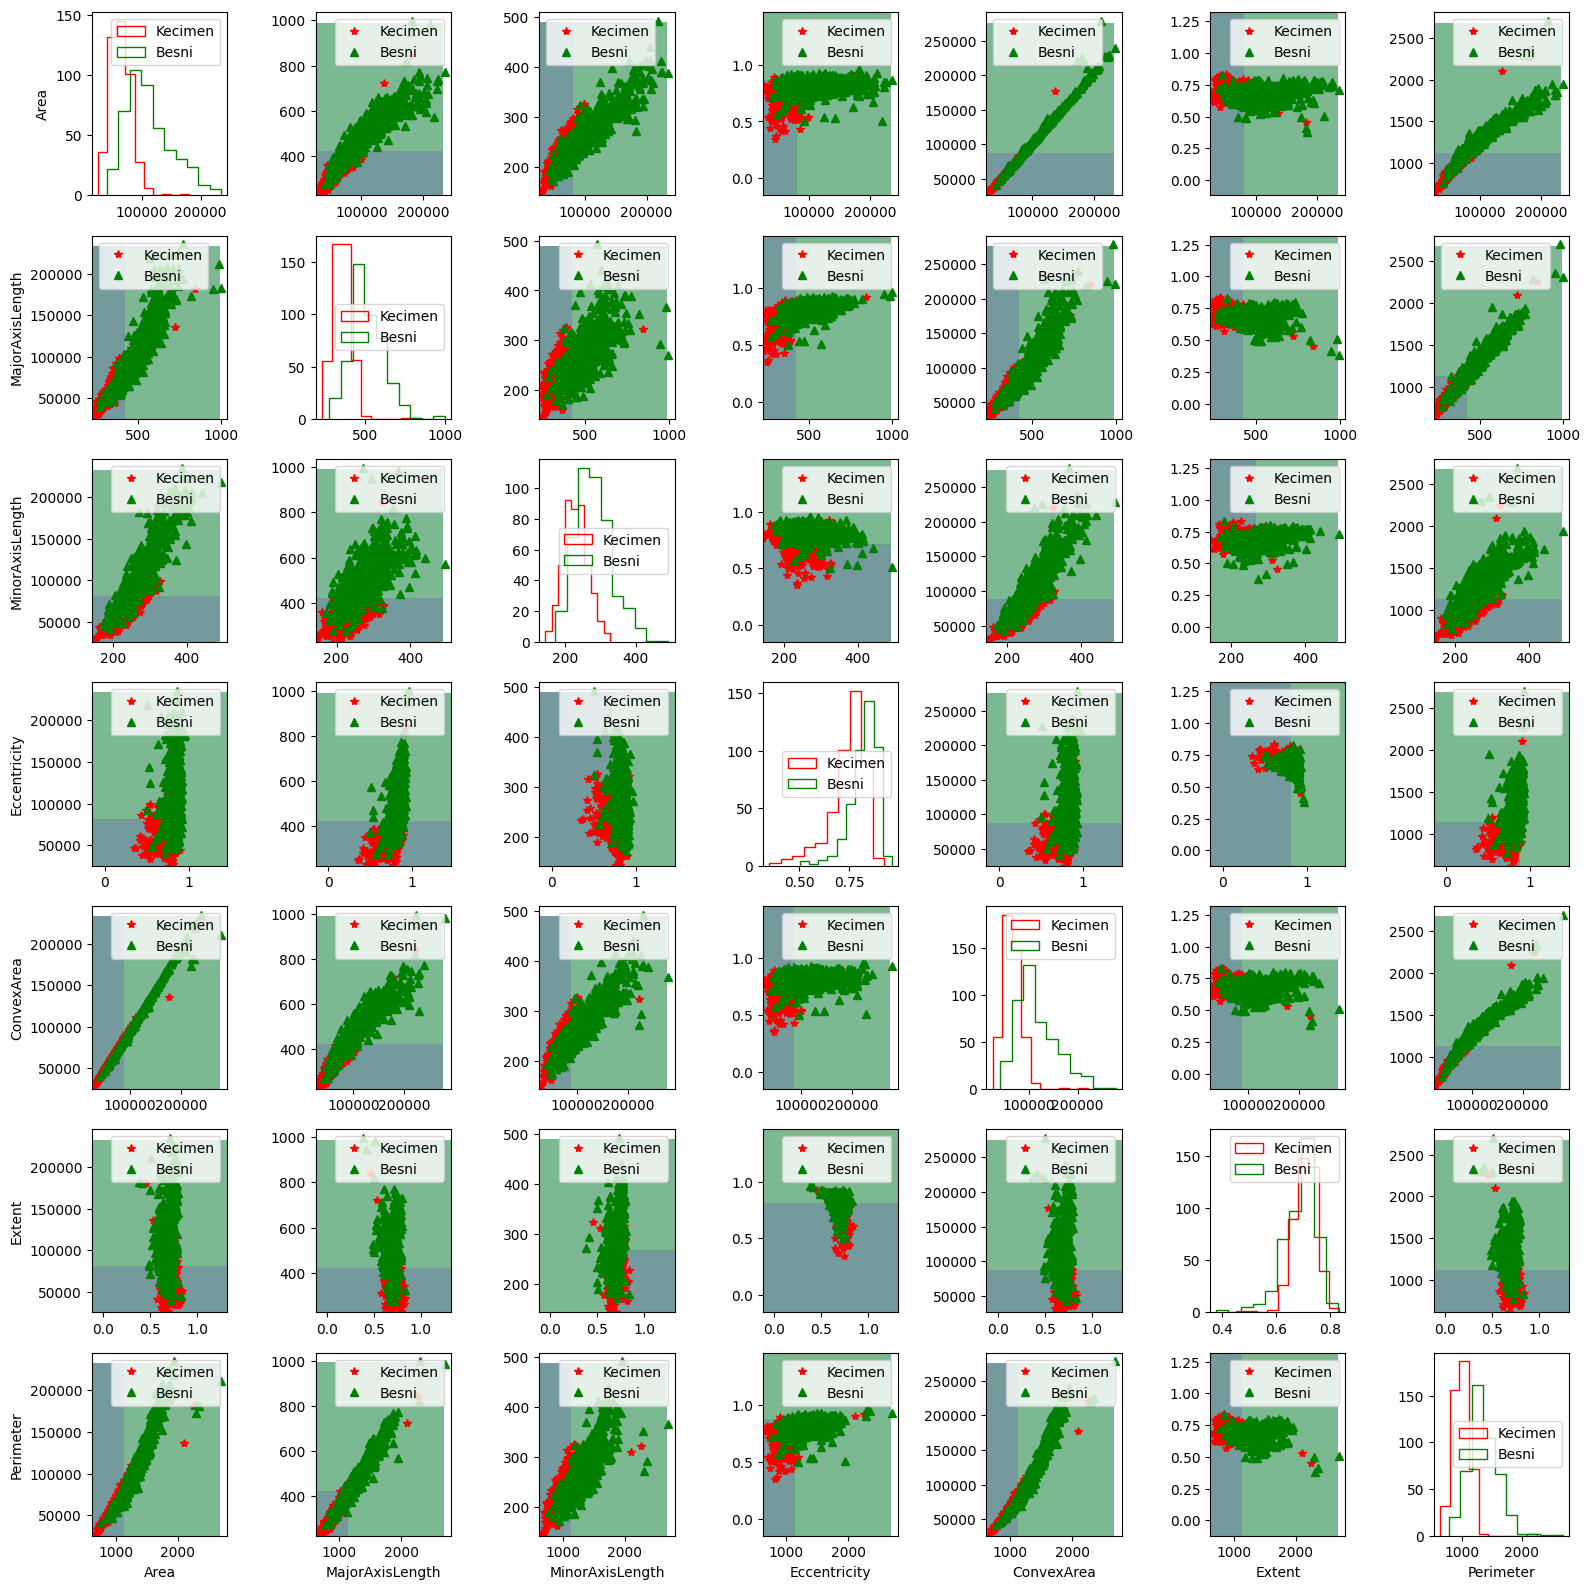

In [57]:
# Уникальные классы и метки
plot_markers = ['r*', 'g^'] # Добавьте больше маркеров при необходимости
answers = dy.unique()
labels = dX.columns.values

# Создаем подграфики для каждой пары признаков
num_classes = len(answers)
f, places = plt.subplots(7, 7, figsize=(16,16))

print(answers)
print(num_classes)

fmin = dX.min().values - 0.5
fmax = dX.max().values + 0.5
plot_step = (fmax - fmin) / 100

# Обходим все subplot
for i in range(len(labels)):
    for j in range(len(labels)):
        # Строим решающие границы
        if i != j:
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step[i]),
                                 np.arange(fmin[j], fmax[j], plot_step[j]))
            model = DecisionTreeClassifier(max_depth=2, random_state=21)
            model.fit(dX.iloc[:, [i,j]].values, dy.values)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)

            # Строим контуры для каждого класса
            for idx_answer in range(num_classes):
                places[i,j].contourf(xx, yy, p == answers[idx_answer], alpha=0.5)

        # Обход всех классов (Вывод обучающей выборки)
        for id_answer in range(num_classes):
            idx = np.where(dy == answers[id_answer])
            if i == j:
                places[i,j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer % len(plot_markers)][0],
                                  histtype='step', label=answers[id_answer])
            else:
                places[i,j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j],
                                 plot_markers[id_answer % len(plot_markers)],
                                 label=answers[id_answer], markersize=6)

        # Печать названия осей
        if j == 0:
            places[i,j].set_ylabel(labels[i])

        if i == len(labels) - 1:
            places[i,j].set_xlabel(labels[j])

# Установка легенды
for ax in places.flat:
    ax.legend()

plt.tight_layout()
plt.show()